In [2]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import time
import pandas as pd
import numpy as np
import math
import re
import os

In [3]:
# Code for scarping data from the web: Data Analyst, Data Engineer, Data Scientist

# d = {
#     'overall_score':[],
#     'company':[],
#     'title':[],
#     'location':[],
#     'EmpBasicInfo':[],
#     'employerStats':[],
#     'JobDescriptionContainer':[],
#     'salary':[]
# }


# for i in range(1,31):
#     driver = webdriver.Chrome('./chromedriver')
#     url = f"https://www.glassdoor.com.hk/Job/data-engineer-jobs-SRCH_KO0,13_IP{i}.htm"
#     driver.get(url)
    
#     time.sleep(5)
    
#     try:
#         driver.find_element_by_class_name("modal_closeIcon").click() # SVGInline-svg modal_closeIcon-svg
#     except:
#         print("pop up issue")
#     finally:
        
#         for i in driver.find_elements_by_id('JobResults'):
#             for j in i.find_elements_by_id('MainCol'):
#                 for k in j.find_elements_by_tag_name('li'):
#                     try:
#                         driver.find_element_by_class_name("modal_closeIcon").click() #SVGInline modal_closeIcon
#                     except Exception as e:
#                         print(e)

#                     try:
#                         d['overall_score'].append(k.find_element_by_class_name("css-19pjha7.e1cjmv6j1").text)
#                     except:
#                         d['overall_score'].append('NA')
#                     try:
#                         d['company'].append(k.find_element_by_class_name("css-l2wjgv.e1n63ojh0.jobLink").text)
#                     except:
#                         d['company'].append('NA')
#                     try:
#                         d['title'].append(k.find_element_by_class_name("jobLink.css-1rd3saf.eigr9kq2").text)
#                     except:
#                         d['title'].append('NA')
#                     try:
#                         d['location'].append(k.find_element_by_class_name("pr-xxsm.css-1ndif2q.e1rrn5ka0").text)
#                     except:
#                         d['location'].append('NA')
#                     try:
#                         d['salary'].append(k.find_element_by_class_name("css-1imh2hq.e1wijj242").text)
#                     except:
#                         d['salary'].append('NA')

#                     try:
#                         k.find_element_by_class_name("css-l2wjgv.e1n63ojh0.jobLink").click()
#                         time.sleep(5)
#                         try:
#                             driver.find_element_by_class_name("SVGInline-svg modal_closeIcon-svg").click()
#                             k.find_element_by_class_name("css-l2wjgv.e1n63ojh0.jobLink").click()
#                         except:
#                             time.sleep(1)
#                     except:
#                         pass 

                    
#                     try:
#                         d['EmpBasicInfo'].append(driver.find_element_by_id('EmpBasicInfo').text)
#                     except:
#                         d['EmpBasicInfo'].append('NA')
#                     try:
#                         d['employerStats'].append(driver.find_element_by_id('employerStats').text)
#                     except:
#                         d['employerStats'].append('NA')

#                     try:
#                         d['JobDescriptionContainer'].append(driver.find_element_by_id('JobDescriptionContainer').text)
#                     except:
#                         d['JobDescriptionContainer'].append('NA')

#     driver.close()

In [4]:
analyst_df = pd.read_csv("Main_Data_Frame.csv")
engineer_df = pd.read_csv("Data_Engineer.csv")
scientist_df = pd.read_csv("Data_Scientist_DataFrame.csv")

In [5]:
print(analyst_df.shape)
print(engineer_df.shape)
print(scientist_df.shape)

(177, 9)
(574, 9)
(312, 9)


In [6]:
total_raw_rows = analyst_df.shape[0] + engineer_df.shape[0] + scientist_df.shape[0]
total_raw_rows

1063

In [7]:
analyst_df = analyst_df.rename(columns={'new_overall_score':'overall_score'})
analyst_df["Job_Category"] = "Data Analyst"
analyst_df.head()

,Unnamed: 0,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,1,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst
1,2,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst
2,3,Pernod Ricard,Data Analyst,NaN,Company Overview\nSize\n10000+ Employees\nFoun...,4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst
3,4,Hays,Data Business Analyst (ETL),Hong Kong,Company Overview\nSize\n5001 to 10000 Employee...,3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst
4,5,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,Company Overview\nSize\n1 to 50 Employees\nTyp...,2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst


In [8]:
# engineer_df = engineer_df[['Unnamed: 0','company', 'title', 'location','EmpBasicInfo', 'employerStats', 'JobDescriptionContainer', 'salary','overall_score']]
engineer_df["Job_Category"] = "Data Engineer"
engineer_df["overall_score"] = engineer_df["employerStats"].apply(lambda x: re.findall('(\d\.\d)', x)[0] if type(x)==str else np.nan)
engineer_df.head()

,Unnamed: 0,overall_score,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,Job_Category
0,0,3.9,Synechron Ltd.,Data Engineer,Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.9\n★★★★★\n79 %\nRecommend to a friend\n92 %\...,Roles & Responsibilities\nInvolved in preparin...,NaN,Data Engineer
1,1,5.0,NLS,Data Engineer – Global Investment Bank,Hong Kong,Company Overview\nSize\n1 to 50 Employees\nTyp...,5.0\n★★★★★\n100 %\nRecommend to a friend\nN/A\...,Job Description\nCreate and update database fo...,NaN,Data Engineer
2,2,3.9,Miscato Limited,Hardware Engineer,Kwun Tong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Published Date: 21 April 2021\nAromeo is looki...,HK$216K - HK$456K (Glassdoor Est.),Data Engineer
3,3,3.8,Vivian Health,Software Engineer,Hong Kong,Company Overview\nSize\n1 to 50 Employees\nTyp...,3.8\n★★★★★\n70 %\nRecommend to a friend\n100 %...,Vivian Health's mission is to empower every he...,NaN,Data Engineer
4,4,3.7,SearchAsia,Data Engineer/ Analyst #JES,NaN,Company Overview\nSize\n51 to 200 Employees\nF...,3.7\n★★★★★\n66 %\nRecommend to a friend\nN/A\n...,Our client is an award-winning eGaming Studio ...,HK$118K - HK$420K (Glassdoor Est.),Data Engineer


In [9]:
# engineer_df = engineer_df[['Unnamed: 0','company', 'title', 'location','EmpBasicInfo', 'employerStats', 'JobDescriptionContainer', 'salary','overall_score','Job_Category']]

In [10]:
scientist_df["Job_Category"] = "Data Scientist"
scientist_df["overall_score"] = scientist_df["employerStats"].apply(lambda x: re.findall('(\d\.\d)', x)[0] if type(x)==str else np.nan)
scientist_df.head()

,Unnamed: 0,overall_score,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,Job_Category
0,0,3.4,Cathay Pacific Airways Ltd,Associate Data Scientist,Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.4\n★★★★★\n46 %\nRecommend to a friend\n24 %\...,Cathay Pacific Airways is an international air...,NaN,Data Scientist
1,1,3.9,Clustertech Limited,Data Scientist / Computational Scientist,Hong Kong,Company Overview\nSize\n51 to 200 Employees\nF...,3.9\n★★★★★\n65 %\nRecommend to a friend\n87 %\...,ClusterTech Limited is committed to providing ...,HK$300K - HK$365K (Glassdoor Est.),Data Scientist
2,2,NaN,Life Code Limited,AI Research Scientist,Kowloon Bay,Company Overview\nSize\nUnknown\nType\nCompany...,NaN,Job Highlights:\nArtificial Intelligence (AI) ...,NaN,Data Scientist
3,3,3.9,IBM,Data Scientist,Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.9\n★★★★★\n78 %\nRecommend to a friend\n86 %\...,"Introduction\nAs a Data Scientist at IBM, you ...",HK$403K - HK$540K (Glassdoor Est.),Data Scientist
4,4,3.7,SearchAsia,Data Engineer/ Analyst #JES,Hong Kong,Company Overview\nSize\n51 to 200 Employees\nF...,3.7\n★★★★★\n66 %\nRecommend to a friend\nN/A\n...,Our client is an award-winning eGaming Studio ...,HK$118K - HK$420K (Glassdoor Est.),Data Scientist


In [11]:
scientist_df = scientist_df[['Unnamed: 0','company', 'title', 'location','EmpBasicInfo', 'employerStats', 'JobDescriptionContainer', 'salary','overall_score','Job_Category']]
scientist_df.head()

,Unnamed: 0,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,0,Cathay Pacific Airways Ltd,Associate Data Scientist,Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.4\n★★★★★\n46 %\nRecommend to a friend\n24 %\...,Cathay Pacific Airways is an international air...,NaN,3.4,Data Scientist
1,1,Clustertech Limited,Data Scientist / Computational Scientist,Hong Kong,Company Overview\nSize\n51 to 200 Employees\nF...,3.9\n★★★★★\n65 %\nRecommend to a friend\n87 %\...,ClusterTech Limited is committed to providing ...,HK$300K - HK$365K (Glassdoor Est.),3.9,Data Scientist
2,2,Life Code Limited,AI Research Scientist,Kowloon Bay,Company Overview\nSize\nUnknown\nType\nCompany...,NaN,Job Highlights:\nArtificial Intelligence (AI) ...,NaN,NaN,Data Scientist
3,3,IBM,Data Scientist,Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.9\n★★★★★\n78 %\nRecommend to a friend\n86 %\...,"Introduction\nAs a Data Scientist at IBM, you ...",HK$403K - HK$540K (Glassdoor Est.),3.9,Data Scientist
4,4,SearchAsia,Data Engineer/ Analyst #JES,Hong Kong,Company Overview\nSize\n51 to 200 Employees\nF...,3.7\n★★★★★\n66 %\nRecommend to a friend\nN/A\n...,Our client is an award-winning eGaming Studio ...,HK$118K - HK$420K (Glassdoor Est.),3.7,Data Scientist


In [12]:
combined_df = pd.concat([analyst_df,engineer_df,scientist_df])
combined_df.shape

(1063, 10)

In [13]:
combined_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            302, 303, 304, 305, 306, 307, 308, 309, 310, 311],
           dtype='int64', length=1063)

In [14]:
combined_df = combined_df.reset_index()
combined_df.index

RangeIndex(start=0, stop=1063, step=1)

In [15]:
combined_df.head()

,index,Unnamed: 0,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,0,1,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst
1,1,2,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst
2,2,3,Pernod Ricard,Data Analyst,NaN,Company Overview\nSize\n10000+ Employees\nFoun...,4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst
3,3,4,Hays,Data Business Analyst (ETL),Hong Kong,Company Overview\nSize\n5001 to 10000 Employee...,3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst
4,4,5,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,Company Overview\nSize\n1 to 50 Employees\nTyp...,2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst


In [16]:
combined_df.columns

Index(['index', 'Unnamed: 0', 'company', 'title', 'location', 'EmpBasicInfo',
       'employerStats', 'JobDescriptionContainer', 'salary', 'overall_score',
       'Job_Category'],
      dtype='object')

In [17]:
combined_df = combined_df.drop(columns=["index","Unnamed: 0"])
combined_df.head()

,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,Company Overview\nSize\n10000+ Employees\nFoun...,3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst
1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst
2,Pernod Ricard,Data Analyst,NaN,Company Overview\nSize\n10000+ Employees\nFoun...,4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst
3,Hays,Data Business Analyst (ETL),Hong Kong,Company Overview\nSize\n5001 to 10000 Employee...,3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst
4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,Company Overview\nSize\n1 to 50 Employees\nTyp...,2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst


In [18]:
combined_df.shape

(1063, 9)

In [19]:
combined_df = combined_df[combined_df["company"].notna()]
combined_df.shape

(1029, 9)

In [20]:
combined_df["EmpBasicInfo"] = combined_df["EmpBasicInfo"].str.split("\n")
combined_df["EmpBasicInfo"] = combined_df["EmpBasicInfo"].apply(lambda x: x[1:] if type(x)==list else np.nan)
combined_df["EmpBasicInfo"] = combined_df["EmpBasicInfo"].apply(lambda x: {i:k for i,k in zip(x[0::2],x[1::2])} if type(x)==list else np.nan)

combined_df["EmpBasicInfo"]

0       {'Size': '10000+ Employees', 'Founded': '2000'...
1                                                     NaN
2       {'Size': '10000+ Employees', 'Founded': '1975'...
3       {'Size': '5001 to 10000 Employees', 'Founded':...
4       {'Size': '1 to 50 Employees', 'Type': 'Company...
                              ...                        
1057    {'Size': '1 to 50 Employees', 'Type': 'Company...
1058    {'Size': 'Unknown', 'Type': 'Company - Private...
1059    {'Size': '201 to 500 Employees', 'Founded': '2...
1061    {'Size': '5001 to 10000 Employees', 'Founded':...
1062    {'Size': '10000+ Employees', 'Type': 'Company ...
Name: EmpBasicInfo, Length: 1029, dtype: object

In [21]:
combined_df = combined_df.reset_index()
combined_df.head()

,index,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category
0,0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,"{'Size': '10000+ Employees', 'Founded': '2000'...",3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst
1,1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst
2,2,Pernod Ricard,Data Analyst,NaN,"{'Size': '10000+ Employees', 'Founded': '1975'...",4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst
3,3,Hays,Data Business Analyst (ETL),Hong Kong,"{'Size': '5001 to 10000 Employees', 'Founded':...",3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst
4,4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,"{'Size': '1 to 50 Employees', 'Type': 'Company...",2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst


In [22]:
temp_size_list = []
temp_year_list = []
temp_type_list = []
temp_industry_list = []
temp_sector_list = []


for i in range(len(combined_df)):
    if type(combined_df["EmpBasicInfo"][i])==dict:
        try:
            temp_size_list.append(combined_df["EmpBasicInfo"][i]["Size"])
        except:
            temp_size_list.append(np.nan)
        try:
            temp_year_list.append(combined_df["EmpBasicInfo"][i]["Founded"])
        except:
            temp_year_list.append(np.nan)
        try:
            temp_type_list.append(combined_df["EmpBasicInfo"][i]["Type"])
        except:
            temp_type_list.append(np.nan)
        try:
            temp_industry_list.append(combined_df["EmpBasicInfo"][i]["Industry"])
        except:
            temp_industry_list.append(np.nan)
        try:
            temp_sector_list.append(combined_df["EmpBasicInfo"][i]["Sector"])
        except:
            temp_sector_list.append(np.nan)
            
    else:
        temp_size_list.append(np.nan)
        temp_year_list.append(np.nan)
        temp_type_list.append(np.nan)
        temp_industry_list.append(np.nan)
        temp_sector_list.append(np.nan)

combined_df["Company_Size"] = pd.Series(temp_size_list)
combined_df["Found_Year"] = pd.Series(temp_year_list)
combined_df["Company_Type"] = pd.Series(temp_type_list)
combined_df["Industry"] = pd.Series(temp_industry_list)
combined_df["Sector"] = pd.Series(temp_sector_list)

combined_df.head()

,index,company,title,location,EmpBasicInfo,employerStats,JobDescriptionContainer,salary,overall_score,Job_Category,Company_Size,Found_Year,Company_Type,Industry,Sector
0,0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,"{'Size': '10000+ Employees', 'Founded': '2000'...",3.7\n★★★★★\n75 %\nRecommend to a friend\n88 %\...,"In Asia Pacific, BNP Paribas is one of the bes...",NaN,3.7,Data Analyst,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance
1,1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9\n★★★★★\n75 %\nRecommend to a friend\n91 %\...,Show More,NaN,3.9,Data Analyst,NaN,NaN,NaN,NaN,NaN
2,2,Pernod Ricard,Data Analyst,NaN,"{'Size': '10000+ Employees', 'Founded': '1975'...",4.1\n★★★★★\n82 %\nRecommend to a friend\n96 %\...,Key Responsibilities:\nCreating simple and mai...,NaN,4.1,Data Analyst,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing
3,3,Hays,Data Business Analyst (ETL),Hong Kong,"{'Size': '5001 to 10000 Employees', 'Founded':...",3.7\n★★★★★\n71 %\nRecommend to a friend\n87 %\...,Your new role\n\nEnsure data interrelationship...,NaN,3.7,Data Analyst,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services
4,4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,"{'Size': '1 to 50 Employees', 'Type': 'Company...",2.8\n★★★★★\nN/A\nRecommend to a friend\nN/A\nA...,"Our client, a well-known US based e-commerce c...",NaN,2.8,Data Analyst,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services


In [23]:
combined_df = combined_df.drop(columns=["index","EmpBasicInfo", "employerStats","JobDescriptionContainer"])
combined_df.head()

,company,title,location,salary,overall_score,Job_Category,Company_Size,Found_Year,Company_Type,Industry,Sector
0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,NaN,3.7,Data Analyst,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance
1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9,Data Analyst,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,NaN,NaN,4.1,Data Analyst,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing
3,Hays,Data Business Analyst (ETL),Hong Kong,NaN,3.7,Data Analyst,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services
4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,NaN,2.8,Data Analyst,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services


In [24]:
combined_df["salary"] = combined_df["salary"].apply(lambda x: re.findall("([H].+[K])",x)[0] if type(x)==str else np.nan)
combined_df["Lower_salary"] = combined_df["salary"].apply(lambda x: re.findall("(\d+)",x)[0] if type(x)==str else np.nan)
combined_df["Upper_salary"] = combined_df["salary"].apply(lambda x: re.findall("(\d+)",x)[-1] if type(x)==str else np.nan)
combined_df.head()

,company,title,location,salary,overall_score,Job_Category,Company_Size,Found_Year,Company_Type,Industry,Sector,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Hong Kong,NaN,3.7,Data Analyst,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Hong Kong,NaN,3.9,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,NaN,NaN,4.1,Data Analyst,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN
3,Hays,Data Business Analyst (ETL),Hong Kong,NaN,3.7,Data Analyst,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Hong Kong,NaN,2.8,Data Analyst,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN


In [25]:
print(combined_df.shape)
print(combined_df.columns)

(1029, 13)
Index(['company', 'title', 'location', 'salary', 'overall_score',
       'Job_Category', 'Company_Size', 'Found_Year', 'Company_Type',
       'Industry', 'Sector', 'Lower_salary', 'Upper_salary'],
      dtype='object')


In [26]:
combined_df = combined_df[['company', 'title','Job_Category', 'location', 'overall_score', 'Company_Size', 'Found_Year', 'Company_Type', 'Industry', 'Sector', 'salary', 'Lower_salary', 'Upper_salary']]
combined_df.head()

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,salary,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Data Analyst,Hong Kong,3.7,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance,NaN,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,Data Analyst,NaN,4.1,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN,NaN
3,Hays,Data Business Analyst (ETL),Data Analyst,Hong Kong,3.7,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Data Analyst,Hong Kong,2.8,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN


In [27]:
print(combined_df.shape)
print()
print(combined_df.dtypes)

(1029, 13)

company          object
title            object
Job_Category     object
location         object
overall_score    object
Company_Size     object
Found_Year       object
Company_Type     object
Industry         object
Sector           object
salary           object
Lower_salary     object
Upper_salary     object
dtype: object


In [28]:
combined_df.Job_Category.value_counts()

Data Engineer     544
Data Scientist    310
Data Analyst      175
Name: Job_Category, dtype: int64

In [29]:
combined_df = combined_df.drop_duplicates()
combined_df

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,salary,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Data Analyst,Hong Kong,3.7,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance,NaN,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,Data Analyst,NaN,4.1,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN,NaN
3,Hays,Data Business Analyst (ETL),Data Analyst,Hong Kong,3.7,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Data Analyst,Hong Kong,2.8,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Arbele Limited,Technical Specialist/ Senior Scientist (Stem C...,Data Scientist,Hong Kong,NaN,1 to 50 Employees,NaN,Company - Private,NaN,NaN,NaN,NaN,NaN
1025,Eternity Consulting,"Data Analyst / Senior Data analyst - SQL, Tabl...",Data Scientist,Lai Chi Kok,3.0,Unknown,NaN,Company - Private,NaN,NaN,HK$276K - HK$480K,276,480
1026,CargoSmart Limited,Data Science / Machine Learning Trainee,Data Scientist,Sha Tin,3.6,201 to 500 Employees,2000,Company - Private,IT Services,Information Technology,HK$120K - HK$312K,120,312
1027,DFS Group,Graduate Development Program (Data Science) 20...,Data Scientist,Hong Kong,3.6,5001 to 10000 Employees,1960,Subsidiary or Business Segment,"Gift, Novelty & Souvenir Stores",Retail,NaN,NaN,NaN


In [30]:
combined_df.shape

(1022, 13)

In [31]:
combined_df.dtypes

company          object
title            object
Job_Category     object
location         object
overall_score    object
Company_Size     object
Found_Year       object
Company_Type     object
Industry         object
Sector           object
salary           object
Lower_salary     object
Upper_salary     object
dtype: object

In [32]:
combined_df.overall_score= combined_df.overall_score.astype("float")
combined_df.dtypes

company           object
title             object
Job_Category      object
location          object
overall_score    float64
Company_Size      object
Found_Year        object
Company_Type      object
Industry          object
Sector            object
salary            object
Lower_salary      object
Upper_salary      object
dtype: object

In [33]:
combined_df.Upper_salary = combined_df.Upper_salary.astype("float")

In [34]:
combined_df.Lower_salary = combined_df.Lower_salary.astype("float")

In [35]:
combined_df.dtypes

company           object
title             object
Job_Category      object
location          object
overall_score    float64
Company_Size      object
Found_Year        object
Company_Type      object
Industry          object
Sector            object
salary            object
Lower_salary     float64
Upper_salary     float64
dtype: object

In [36]:
combined_df.head(10)

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,salary,Lower_salary,Upper_salary
0,BNP Paribas,"Data Analyst, IG Hub APAC",Data Analyst,Hong Kong,3.7,10000+ Employees,2000,Company - Public,Banks & Credit Unions,Finance,NaN,NaN,NaN
1,TBM The Beauty Medical,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pernod Ricard,Data Analyst,Data Analyst,NaN,4.1,10000+ Employees,1975,Company - Private,Food & Beverage Manufacturing,Manufacturing,NaN,NaN,NaN
3,Hays,Data Business Analyst (ETL),Data Analyst,Hong Kong,3.7,5001 to 10000 Employees,1968,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN
4,Seamatch Asia,System Analyst / Data Scientist,Data Analyst,Hong Kong,2.8,1 to 50 Employees,NaN,Company - Private,Staffing & Outsourcing,Business Services,NaN,NaN,NaN
5,Page Personnel,(Senior) Data Analyst (SAS & SQL) - Banking,Data Analyst,Hong Kong,4.2,Unknown,NaN,Company - Public,NaN,NaN,NaN,NaN,NaN
6,APASS International,Business/ Data Analyst (Finance) (1-Year Contr...,Data Analyst,Hong Kong,5.0,Unknown,NaN,Company - Private,NaN,NaN,HK$204K - HK$300K,204.0,300.0
7,中国太平人寿保险(香港)有限公司,Data Analyst,Data Analyst,Hong Kong,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Michael Page HK,(Senior) Data Analyst (SAS & SQL) - Banking,Data Analyst,Hong Kong,3.6,201 to 500 Employees,NaN,Company - Private,Security Services,Business Services,NaN,NaN,NaN
9,Global Executive Consultants,Data Analyst / BI Specialist (HKD $45 - 55K),Data Analyst,Hong Kong,3.0,1 to 50 Employees,NaN,Contract,NaN,NaN,HK$185K - HK$420K,185.0,420.0


In [37]:
combined_df['mean_salary'] = combined_df['Lower_salary'] + combined_df['Upper_salary'] / 2

In [38]:
combined_df.tail()

,company,title,Job_Category,location,overall_score,Company_Size,Found_Year,Company_Type,Industry,Sector,salary,Lower_salary,Upper_salary,mean_salary
1024,Arbele Limited,Technical Specialist/ Senior Scientist (Stem C...,Data Scientist,Hong Kong,NaN,1 to 50 Employees,NaN,Company - Private,NaN,NaN,NaN,NaN,NaN,NaN
1025,Eternity Consulting,"Data Analyst / Senior Data analyst - SQL, Tabl...",Data Scientist,Lai Chi Kok,3.0,Unknown,NaN,Company - Private,NaN,NaN,HK$276K - HK$480K,276.0,480.0,516.0
1026,CargoSmart Limited,Data Science / Machine Learning Trainee,Data Scientist,Sha Tin,3.6,201 to 500 Employees,2000,Company - Private,IT Services,Information Technology,HK$120K - HK$312K,120.0,312.0,276.0
1027,DFS Group,Graduate Development Program (Data Science) 20...,Data Scientist,Hong Kong,3.6,5001 to 10000 Employees,1960,Subsidiary or Business Segment,"Gift, Novelty & Souvenir Stores",Retail,NaN,NaN,NaN,NaN
1028,Bank of China (Hong Kong),Senior Data Analyst / Data Analyst (Data Scien...,Data Scientist,Hong Kong,3.3,10000+ Employees,NaN,Company - Public,Banks & Credit Unions,Finance,NaN,NaN,NaN,NaN


In [43]:
combined_df['company'].value_counts().head(10)

Pinpoint Asia       81
Michael Page HK     28
Page Personnel      16
Arup                14
Swing Consulting    13
Match Talent        13
Seamatch Asia       11
Société Générale    11
Pacific Careers     10
Hays                 9
Name: company, dtype: int64

<AxesSubplot:>

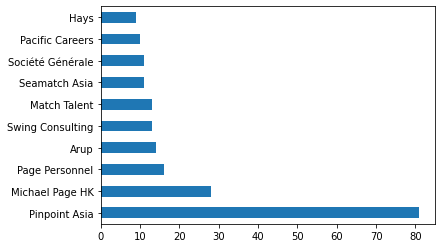

In [50]:
combined_df['company'].value_counts().head(10).plot(kind="barh")

In [53]:
combined_df['location'].value_counts()

Hong Kong           900
Quarry Bay           16
Kwun Tong            15
Kowloon City         10
Lai Chi Kok           7
Central               7
Sha Tin               6
Sheung Wan            6
Remote                6
Kowloon Bay           5
Tseung Kwan O         5
Causeway Bay          5
Cyberport             3
Chai Wan              3
Pok Fu Lam            3
Hung Hom              3
Hong Kong Island      3
Taikoo Shing          2
Tsuen Wan             2
Tsim Sha Tsui         2
Wong Chuk Hang        2
Ap Lei Chau           1
Pak Shek Kok          1
Happy Valley          1
Sai Ying Pun          1
Mong Kok              1
Sai Wan               1
Clear Water Bay       1
Name: location, dtype: int64

<AxesSubplot:>

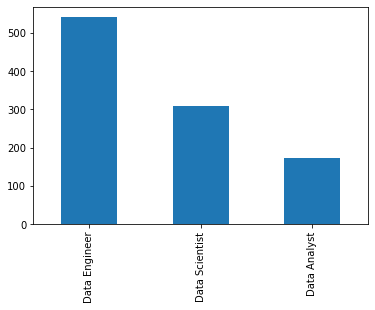

In [56]:
combined_df['Job_Category'].value_counts().plot(kind='bar',)

In [60]:
df1 = combined_df['Lower_salary'] == 144

0       False
1       False
2       False
3       False
4       False
        ...  
1024    False
1025    False
1026    False
1027    False
1028    False
Name: Lower_salary, Length: 1022, dtype: bool

In [70]:
df1 = combined_df[combined_df['Sector'] == 'Education']